---
title: "Multi-Armed Bandit (MAB)"
---

# Introduction

The Multi-Arm Bandit (MAB) problem is a fundamental framework in reinforcement learning and decision theory, addressing the critical trade-off between exploration and exploitation. It provides insights into decision-making in uncertain environments, where an agent must strategically choose between multiple options (arms) with unknown reward distributions to maximize cumulative rewards over time.

# $\epsilon$-Greedy Action Selection

The $\epsilon$-Greedy strategy is a classic approach in multi-armed bandit problems, offering a balance between exploration and exploitation. Unlike softmax action selection, $\epsilon$-Greedy simplifies the decision-making process. The agent, with probability $1 - \epsilon$, chooses the action with the highest estimated value (exploitation), and with probability $\epsilon$, explores a random action.

## Mathematical Representation

Let's delve into the mathematical symbols that define the $\epsilon$-Greedy MAB algorithm:

- **$k$:** Number of arms in the bandit.
- **$Q(a):$** Estimated value (average reward) of arm $a$.
- **$N(a):$** Number of times arm $a$ has been selected.
- **$\epsilon:$** Exploration-exploitation trade-off parameter, representing the probability of choosing a random action.

The algorithm initializes estimates and counters for each arm:

$$
\begin{align*}
Q(a) &\leftarrow 0 \quad \text{(Initialize estimated values)} \\
N(a) &\leftarrow 0 \quad \text{(Initialize visit counts)}
\end{align*}
$$

The main loop of the algorithm is executed indefinitely:

1. **Action Selection:**
    - $A \leftarrow 
    \begin{cases} 
    \text{argmax}_a Q(a) & \text{with probability } 1 - \epsilon \text{ (breaking ties randomly)} \\
    \text{a random action} & \text{with probability } \epsilon 
    \end{cases}$

    Here, the agent selects an action based on estimated values with high probability but introduces randomness (exploration) with probability $\epsilon$.

2. **Reward Observation:**
    - $R \leftarrow \text{bandit}(A)$

    The agent receives a reward from the bandit by pulling the chosen arm.

3. **Update Estimates:**
    - $N(A) \leftarrow N(A) + 1$
    - $Q(A) \leftarrow Q(A) + \alpha [R - Q(A)]$ where $\alpha = \frac{1}{N(A) + 1}$.

    The estimates and visit counts for the chosen arm are updated based on the received reward.

### Expanding on the Algorithm
- **Exploration-Exploitation Trade-off:**
    The parameter $\epsilon$ controls the balance between exploration and exploitation. A higher $\epsilon$ encourages more exploration, while a lower value promotes exploitation.
  
- **Incremental Update Rule:**
    The update rule $Q(A) \leftarrow Q(A) + \alpha [R - Q(A)]$, where $\alpha = \frac{1}{N(A) + 1}$, ensures adaptive learning by gradually replacing past estimates with new observations.
  
- **Random Tie-Breaking:**
    Ties in selecting the action with the maximum estimated value are broken randomly, preventing bias towards a specific action in case of ties.
  
- **Convergence and Learning:**
    Over time, as the algorithm continues to explore and exploit, the estimated values $Q(a)$ converge to the true values of the arms. This results in improved decision-making as the agent learns from experience.

## Bandit Simulation
Let's run a simulation of a 10-armed bandit using the described $\epsilon$-Greedy algorithm:

In [1]:
import numpy as np

class MultiArmBandit:
    def __init__(self, k, epsilon):
        self.k = k  # Number of arms
        self.epsilon = epsilon  # Exploration-exploitation trade-off parameter
        self.q_values = np.zeros(k)  # Estimated values for each arm
        self.action_counts = np.zeros(k)  # Number of times each arm has been selected

    def select_action(self):
        if np.random.rand() < self.epsilon:
            # Exploration: Choose a random action
            action = np.random.choice(self.k)
        else:
            # Exploitation: Choose the action with the highest estimated value
            action = np.argmax(self.q_values)

        return action

    def update_values(self, action, reward):
        # Incremental update rule with alpha = 1 / (N(A) + 1)
        alpha = 1 / (self.action_counts[action] + 1)
        self.action_counts[action] += 1
        self.q_values[action] += alpha * (reward - self.q_values[action])

In [2]:
# Simulation parameters
num_arms = 10
num_steps = 10000
true_reward_means = np.random.normal(loc=0, scale=1, size=num_arms)
epsilon_values = [0, 0.01, 0.1, 0.5, 0.9, 1.0]

# Run simulations for each epsilon value
reward_history = {epsilon: [] for epsilon in epsilon_values}

for epsilon in epsilon_values:
    bandit = MultiArmBandit(num_arms, epsilon)
    step_rewards = []

    for step in range(num_steps):
        chosen_action = bandit.select_action()
        true_reward = np.random.normal(loc=true_reward_means[chosen_action], scale=1)
        bandit.update_values(chosen_action, true_reward)
        step_rewards.append(true_reward)

    reward_history[epsilon] = step_rewards

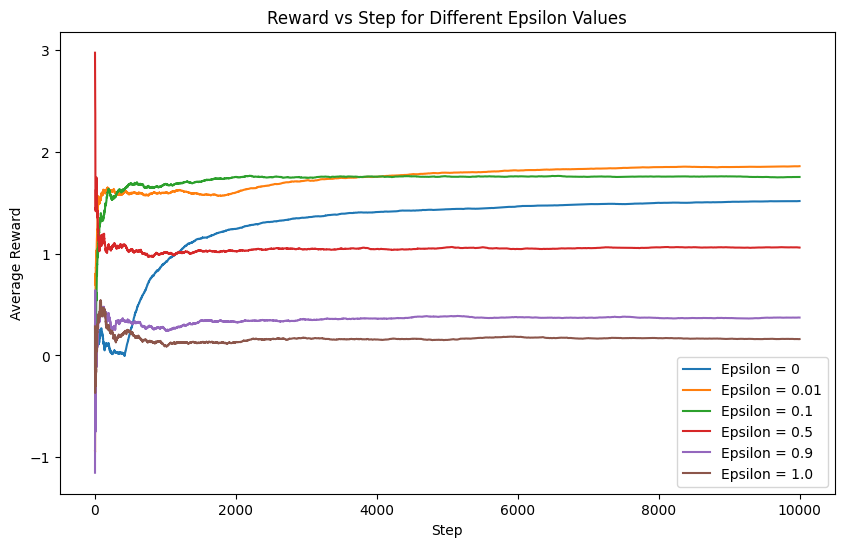

In [3]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for epsilon, rewards in reward_history.items():
    plt.plot(np.arange(1, num_steps + 1), np.cumsum(rewards) / np.arange(1, num_steps + 1), label=f'Epsilon = {epsilon}')

plt.title('Reward vs Step for Different Epsilon Values')
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

The generated plot illustrates the average reward evolution over time, showcasing the impact of various exploration-exploitation trade-off values ($\epsilon$). Each line corresponds to a specific $\epsilon$ value, offering insights into the algorithm's behavior under varying degrees of exploration and exploitation.

# Softmax Action Selection

While the $\epsilon$-Greedy strategy is effective, another widely used method in multi-armed bandit problems is softmax action selection. The softmax function introduces a temperature parameter ($\tau$) that influences the level of exploration. A higher temperature encourages exploration, allowing the algorithm to consider a more diverse set of actions, while a lower temperature promotes exploitation, favoring actions with higher estimated values.

## Softmax Action Selection Equation

The softmax action selection equation is given by:

$$
\pi(a_i) = \frac{Q(a_i)/\tau}{\sum_{i=1}^k Q(a_i)/\tau}
$$

where:

- $\pi(a_i)$ is the probability of selecting action $a_i$.
- $Q(a_i)$ is the estimated value of action $a_i$.
- $\tau$ is the softmax temperature parameter.
- $k$ is the number of arms.

## Implementation in Multi-Arm Bandit

Let's modify the `MultiArmBandit` class to incorporate softmax action selection:

In [4]:
class MultiArmBandit:
    def __init__(self, k, tau):
        self.k = k  # Number of arms
        self.tau = tau  # Softmax temperature parameter
        self.q_values = np.zeros(k)  # Estimated values for each arm
        self.action_counts = np.zeros(k)  # Number of times each arm has been selected

    def select_action(self):
        # Softmax action selection
        softmax_probs = np.exp(self.q_values / self.tau) / np.sum(np.exp(self.q_values / self.tau))
        action = np.random.choice(self.k, p=softmax_probs)
        return action

    def update_values(self, action, reward):
        # Incremental update rule with alpha = 1 / (N(A) + 1)
        alpha = 1 / (self.action_counts[action] + 1)
        self.action_counts[action] += 1
        self.q_values[action] += alpha * (reward - self.q_values[action])

In this modification, the `select_action` method calculates softmax probabilities based on the estimated values and the softmax temperature. The action is then chosen probabilistically according to these softmax probabilities.

## Simulation with Softmax Action Selection

Now, let's run a simulation using the softmax-based `MultiArmBandit` class. Experiment with different values of the softmax temperature ($\tau$) to observe its impact on the algorithm's learning strategy and the trade-off between exploration and exploitation.

In [5]:
# Simulation parameters
num_arms = 10
num_steps = 10000
true_reward_means = np.random.normal(loc=0, scale=1, size=num_arms)
softmax_tau_values = [0.1, 1.0, 10.0]

# Run simulations for each softmax temperature value
softmax_reward_history = {tau: [] for tau in softmax_tau_values}

for tau in softmax_tau_values:
    softmax_bandit = MultiArmBandit(num_arms, tau)
    softmax_step_rewards = []

    for step in range(num_steps):
        chosen_action = softmax_bandit.select_action()
        true_reward = np.random.normal(loc=true_reward_means[chosen_action], scale=1)
        softmax_bandit.update_values(chosen_action, true_reward)
        softmax_step_rewards.append(true_reward)

    softmax_reward_history[tau] = softmax_step_rewards

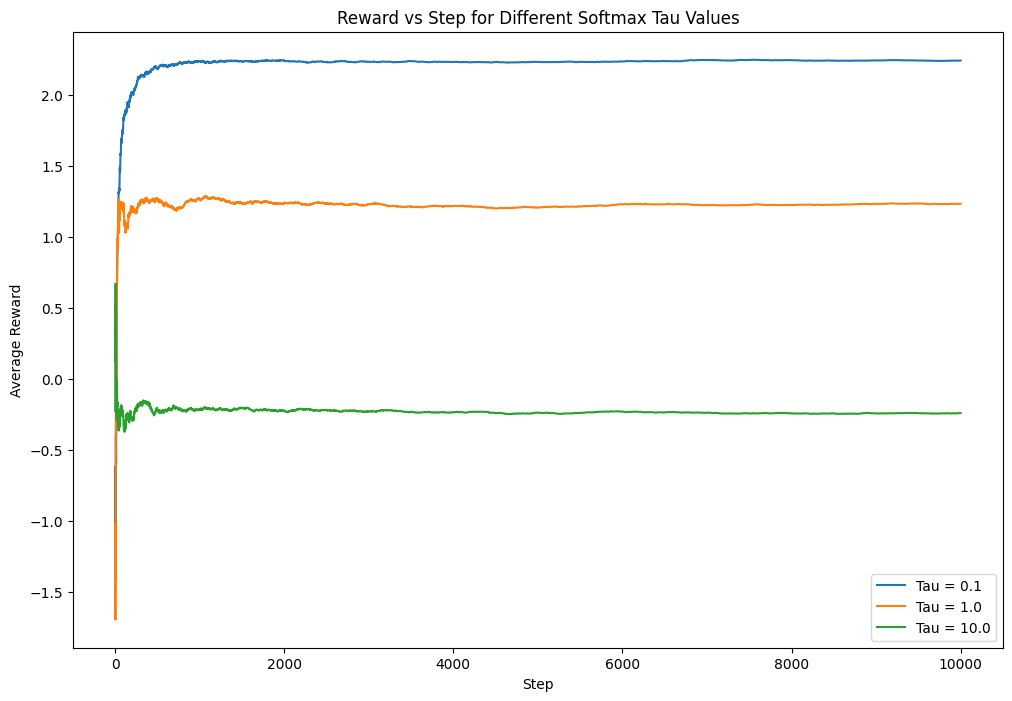

In [6]:
# Plotting for Softmax Action Selection
plt.figure(figsize=(12, 8))
for tau, rewards in softmax_reward_history.items():
    plt.plot(np.arange(1, num_steps + 1), np.cumsum(rewards) / np.arange(1, num_steps + 1), label=f'Tau = {tau}')

plt.title('Reward vs Step for Different Softmax Tau Values')
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

The generated plot for softmax action selection illustrates the average reward over time for different softmax temperature values ($\tau$). This provides insights into how the algorithm adapts its learning strategy under varying levels of exploration and exploitation.

# Conclusion
In conclusion, the $\epsilon$-Greedy and softmax action selection strategies offer distinct approaches to address the exploration-exploitation trade-off in multi-armed bandit problems. Depending on the specific requirements and characteristics of the environment, one strategy may outperform the other. Experimenting with different parameters and understanding their impact is crucial for effective decision-making in dynamic and uncertain scenarios.